In [ ]:
pip install researchpy

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from imblearn.combine import SMOTETomek
from collections import Counter
import researchpy as rp
from imblearn.over_sampling import ADASYN
import warnings

# Uploading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Credit_Card.csv to Credit_Card.csv


# Reading the dataset

In [ ]:
df=pd.read_csv('Credit_Card.csv',keep_default_na=False, na_values=[""])
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# Exploring the data

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.shape

(1550, 31)

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1550.00000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000
mean,590.08129,-0.199318,0.214740,0.860697,0.207538,-0.049612,0.101079,0.120874,-0.057181,-0.010760,0.014520,0.117792,0.273520,-0.105474,-0.165123,0.221349,-0.119672,-0.081052,-0.160989,0.052485,0.066217,-0.013906,-0.123261,-0.044414,0.003439,0.117308,0.040225,0.012024,-0.012843,69.129019,0.016129
std,353.63843,1.306408,1.104873,0.993275,1.251919,1.069094,1.200804,0.861837,0.888027,0.897770,0.971522,0.995724,0.652301,0.897984,0.776322,0.902893,0.790681,0.693331,0.756387,0.798873,0.522410,0.589752,0.592396,0.358490,0.613401,0.414499,0.468647,0.328270,0.252601,183.098566,0.126012
min,0.00000,-6.169664,-12.114213,-5.694973,-4.657545,-9.749440,-3.498447,-4.925568,-12.258158,-3.110515,-3.563578,-2.449774,-2.899907,-3.389510,-6.576789,-3.618060,-3.576361,-5.400014,-3.510029,-3.463993,-2.538941,-4.134608,-2.776923,-4.020300,-1.867208,-1.577384,-1.243924,-3.525281,-2.735623,0.000000,0.000000
25%,283.00000,-0.963378,-0.226674,0.287300,-0.514338,-0.558394,-0.646990,-0.295339,-0.179686,-0.492462,-0.428548,-0.627234,-0.145863,-0.736582,-0.446781,-0.322110,-0.609615,-0.489537,-0.597062,-0.440828,-0.138301,-0.220045,-0.534464,-0.184692,-0.368455,-0.148865,-0.291736,-0.057616,-0.024583,5.117500,0.000000
50%,584.50000,-0.386680,0.266845,0.865887,0.295612,-0.137294,-0.161681,0.103191,0.027835,-0.069605,-0.094473,0.012573,0.294717,-0.091209,-0.049601,0.318731,-0.032552,-0.121336,-0.145801,0.012870,0.002016,-0.078658,-0.114498,-0.056319,0.092519,0.144768,0.012893,0.017133,0.020797,17.240000,0.000000
75%,908.00000,1.114131,0.862487,1.510946,1.039779,0.413550,0.445586,0.573294,0.251995,0.434957,0.303094,0.963775,0.738419,0.532662,0.300854,0.856456,0.425051,0.253283,0.267455,0.561044,0.176216,0.083787,0.278320,0.065045,0.425105,0.402713,0.284301,0.110010,0.082345,64.977500,0.000000
max,1216.00000,1.685314,6.118940,4.017561,4.861129,7.672544,6.456410,10.784088,3.877662,6.450992,11.906868,3.202033,2.152055,3.182541,1.977296,2.703685,2.165175,3.986289,2.689762,3.097749,7.744222,5.398083,1.957759,4.095021,1.215279,1.629684,3.463246,2.490503,1.575380,3828.040000,1.000000


In [ ]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1548,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df['Class'].value_counts()

0.0    1525
1.0      25
Name: Class, dtype: int64

# Statistical and Consistency Analysis

In [ ]:
df_0 = df[df["Class"] == 0]
df_0.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
rp.summary_cont(df_0)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Time,1525.0,589.1744,354.1541,9.0690,571.3855,606.9634
1,V1,1525.0,-0.1965,1.3086,0.0335,-0.2622,-0.1308
2,V2,1525.0,0.2094,1.1054,0.0283,0.1539,0.2649
3,V3,1525.0,0.8603,0.9901,0.0254,0.8106,0.9101
4,V4,1525.0,0.2021,1.2485,0.0320,0.1394,0.2648
5,V5,1525.0,-0.0510,1.0709,0.0274,-0.1048,0.0027
6,V6,1525.0,0.1013,1.2038,0.0308,0.0409,0.1618
7,V7,1525.0,0.1239,0.8526,0.0218,0.0811,0.1667
8,V8,1525.0,-0.0507,0.8645,0.0221,-0.0941,-0.0072
9,V9,1525.0,-0.0065,0.8993,0.0230,-0.0517,0.0386


In [ ]:
np.var(df_0)

Time      125342.865313
V1             1.711205
V2             1.221169
V3             0.979665
V4             1.557854
V5             1.145979
V6             1.448157
V7             0.726374
V8             0.746954
V9             0.808284
V10            0.940657
V11            0.984985
V12            0.421499
V13            0.802415
V14            0.595540
V15            0.809589
V16            0.629855
V17            0.478994
V18            0.572050
V19            0.642725
V20            0.271749
V21            0.330451
V22            0.350761
V23            0.128606
V24            0.376260
V25            0.170984
V26            0.221678
V27            0.108882
V28            0.064241
Amount     33858.227675
Class          0.000000
dtype: float64

In [ ]:
scipy.stats.skew(df_0)

array([ 0.03756189, -0.79605958, -1.63615819, -0.54323566, -0.21824841,
        0.04440554,  1.68695172,  1.71242614, -4.16956253,  0.89944223,
        3.61204283,  0.10960162, -0.27469326, -0.08319161, -2.40589775,
       -0.48839183, -0.58010827,  0.33372836, -0.07729469, -0.02300284,
        4.11534313,  4.07092951, -0.0705355 ,  0.60191846, -0.68085134,
       -0.40487158,  1.04950047, -1.25374618, -2.83201053,  9.75681714,
        0.        ])

In [ ]:
df_1 = df[df["Class"] == 1]
df_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
166,105.0,1.175094,0.408263,0.552145,1.255068,-0.196662,-0.565605,0.133973,-0.146202,-0.214155,-0.011310,0.290717,0.975735,1.117979,0.144788,1.037954,-0.292529,-0.142181,-0.767216,-0.962711,-0.116439,0.130585,0.523640,-0.050125,0.448133,0.597867,-0.275067,0.043308,0.023924,1.00,1.0
271,192.0,-0.351287,1.183754,0.530794,0.543891,0.798441,-0.804472,1.563170,-0.935794,0.633634,2.303627,1.398891,-0.318657,-1.410645,-0.155225,0.277950,-0.706228,-0.780092,0.354094,0.618678,0.596401,-0.121755,0.668124,-0.057380,0.301398,-0.730946,-0.538616,-0.037212,-0.479956,1.79,1.0
370,270.0,-1.356935,0.033724,1.874195,-1.469102,-3.125909,1.677056,-4.925568,-7.494658,-1.278470,-1.118778,-1.777745,-0.233932,-1.835762,-0.187562,-2.594957,-0.438051,1.682071,-0.129589,-0.924229,1.394631,-4.134608,0.864378,0.153499,0.669049,1.108159,-0.120671,0.043393,0.237636,52.95,1.0
415,300.0,0.007043,1.239504,0.417050,0.530004,0.942324,-0.559968,1.502981,-0.751563,0.012713,1.619208,1.237696,0.446131,0.156190,-0.152586,0.076428,-0.571061,-0.860984,0.329831,0.744637,0.557375,-0.046722,0.720870,-0.141873,0.019747,-0.665861,-0.489940,0.157919,-0.332123,1.91,1.0
475,352.0,-0.703183,1.210704,0.713731,1.146381,0.196790,0.468060,0.204977,0.627389,-0.296261,-0.309001,-1.645999,-0.351983,-0.683078,0.429833,0.320011,-0.819032,0.536239,-0.277009,1.038315,0.015529,-0.052939,0.044339,-0.184853,-0.776439,0.021548,-0.166427,0.297892,0.128381,13.99,1.0


In [ ]:
rp.summary_cont(df_1)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Time,25.0,645.4000,322.2659,64.4532,512.3752,778.4248
1,V1,25.0,-0.3711,1.1787,0.2357,-0.8577,0.1154
2,V2,25.0,0.5397,1.0401,0.2080,0.1104,0.9691
3,V3,25.0,0.8831,1.1943,0.2389,0.3901,1.3761
4,V4,25.0,0.5414,1.4316,0.2863,-0.0495,1.1324
5,V5,25.0,0.0380,0.9711,0.1942,-0.3629,0.4389
6,V6,25.0,0.0852,1.0227,0.2045,-0.3370,0.5074
7,V7,25.0,-0.0638,1.3221,0.2644,-0.6096,0.4819
8,V8,25.0,-0.4542,1.8076,0.3615,-1.2003,0.2920
9,V9,25.0,-0.2678,0.7683,0.1537,-0.5850,0.0493


In [ ]:
np.var(df_1)

Time      99701.120000
V1            1.333798
V2            1.038588
V3            1.369382
V4            1.967516
V5            0.905359
V6            1.004144
V7            1.678148
V8            3.136731
V9            0.566678
V10           1.065837
V11           1.343215
V12           0.618118
V13           0.994289
V14           1.013544
V15           1.097382
V16           0.296043
V17           0.559513
V18           0.534866
V19           0.335058
V20           0.313910
V21           1.387149
V22           0.338175
V23           0.117791
V24           0.359325
V25           0.212207
V26           0.075903
V27           0.032417
V28           0.034537
Amount    11446.066191
Class         0.000000
dtype: float64

In [ ]:
scipy.stats.skew(df_1)

array([ 2.16294657e-01, -1.55568409e-01, -1.56092726e+00,  2.22627030e-01,
        2.64393545e-01, -8.96746697e-01,  1.23710982e+00, -2.16981045e+00,
       -2.74298641e+00, -1.65004126e+00, -1.68335530e-01,  4.34737134e-01,
       -1.94264293e+00, -3.73203993e-01, -2.79677824e+00, -1.14054572e+00,
       -6.49804700e-02, -1.18048887e+00,  1.28428960e+00,  3.45800087e-01,
        1.71325565e+00, -8.27385847e-02,  9.89560693e-05,  2.72404060e+00,
       -6.55720376e-01,  7.77585799e-02,  2.29070310e-01, -1.68176420e-01,
       -8.92863476e-01,  3.65865890e+00,  0.00000000e+00])

# A significant difference is present between classes 0 and 1. Hence, it can be attributed as an imbalanced dataset.

# Plotting of data points for all the 6 combinations of four random feature variables after which are V5, V11, V14, V23, in order to visualise overlapping.

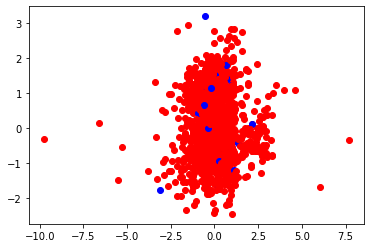

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,5]
  x2=df.iloc[i,11]
  x3=df.iloc[i,14]
  x4=df.iloc[i,23]
  y=df.iloc[i,30]
  if(y==0):
    plt.scatter(x1,x2,color='red')
  else:
    plt.scatter(x1,x2,color='blue')
plt.show()

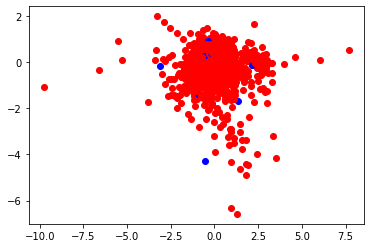

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,5]
  x2=df.iloc[i,11]
  x3=df.iloc[i,14]
  x4=df.iloc[i,23]
  y=df.iloc[i,30]
  if(y==0):
    plt.scatter(x1,x3,color='red')
  else:
    plt.scatter(x1,x3,color='blue')
plt.show()

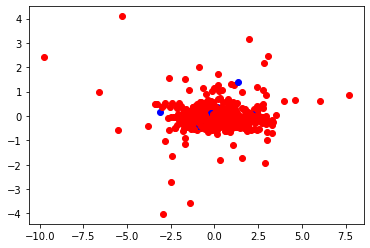

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,5]
  x2=df.iloc[i,11]
  x3=df.iloc[i,14]
  x4=df.iloc[i,23]
  y=df.iloc[i,30]
  if(y==0):
    plt.scatter(x1,x4,color='red')
  else:
    plt.scatter(x1,x4,color='blue')
plt.show()

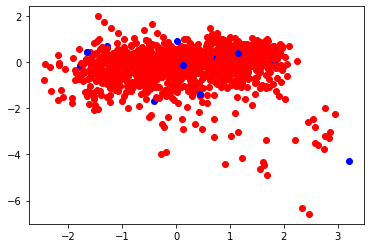

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,5]
  x2=df.iloc[i,11]
  x3=df.iloc[i,14]
  x4=df.iloc[i,23]
  y=df.iloc[i,30]
  if(y==0):
    plt.scatter(x2,x3,color='red')
  else:
    plt.scatter(x2,x3,color='blue')
plt.show()

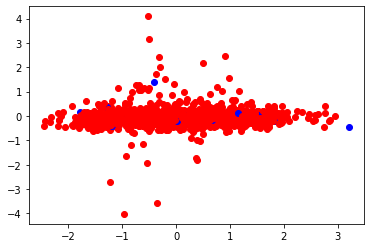

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,5]
  x2=df.iloc[i,11]
  x3=df.iloc[i,14]
  x4=df.iloc[i,23]
  y=df.iloc[i,30]
  if(y==0):
    plt.scatter(x2,x4,color='red')
  else:
    plt.scatter(x2,x4,color='blue')
plt.show()

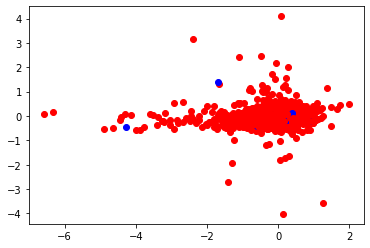

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,5]
  x2=df.iloc[i,11]
  x3=df.iloc[i,14]
  x4=df.iloc[i,23]
  y=df.iloc[i,30]
  if(y==0):
    plt.scatter(x3,x4,color='red')
  else:
    plt.scatter(x3,x4,color='blue')
plt.show()

# Hence, it can be confirmed from the above scatter plots that all of the six randomly selected features, hence all other features, overlap with one another as expected.

# Data Splicing

In [ ]:
x=df.drop('Class',axis=1)
y=df['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

# Decision Tree Clasiifier

In [ ]:
warnings.filterwarnings('ignore')
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train,y_train)
y_pred = tree_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(tree, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(tree, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(tree, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.966

Confusion Matrix : 
 [[375   7]
 [  6   0]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       382
         1.0       0.00      0.00      0.00         6

    accuracy                           0.97       388
   macro avg       0.49      0.49      0.49       388
weighted avg       0.97      0.97      0.97       388


Accuracy using 10 fold Cross validation =  0.9621131741821397

Precision using 10 fold Cross validation =  0.0

Recall using 10 fold Cross validation =  0.0


# KNN Classifier

In [ ]:
warnings.filterwarnings('ignore')
knn = KNeighborsClassifier(n_neighbors = 3)
knn_fit = knn.fit(x_train,y_train)
y_pred = knn_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(knn, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(knn, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.985

Confusion Matrix : 
 [[382   0]
 [  6   0]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       382
         1.0       0.00      0.00      0.00         6

    accuracy                           0.98       388
   macro avg       0.49      0.50      0.50       388
weighted avg       0.97      0.98      0.98       388


Accuracy using 10 fold Cross validation =  0.9836501620984379

Precision using 10 fold Cross validation =  0.0

Recall using 10 fold Cross validation =  0.0


# SVM Classifier

In [ ]:
warnings.filterwarnings('ignore')
mod = SVC()
mod_fit = mod.fit(x_train,y_train)
y_pred = mod_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(mod, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(mod, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(mod, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.985

Confusion Matrix : 
 [[382   0]
 [  6   0]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       382
         1.0       0.00      0.00      0.00         6

    accuracy                           0.98       388
   macro avg       0.49      0.50      0.50       388
weighted avg       0.97      0.98      0.98       388


Accuracy using 10 fold Cross validation =  0.9836501620984379

Precision using 10 fold Cross validation =  0.0

Recall using 10 fold Cross validation =  0.0


# Logistic Regression

In [ ]:
warnings.filterwarnings('ignore')
log=LogisticRegression()
log_fit = log.fit(x_train,y_train)
log.score(x_test,y_test)
y_pred=log_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(log, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(log, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(log, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.982

Confusion Matrix : 
 [[381   1]
 [  6   0]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       382
         1.0       0.00      0.00      0.00         6

    accuracy                           0.98       388
   macro avg       0.49      0.50      0.50       388
weighted avg       0.97      0.98      0.98       388


Accuracy using 10 fold Cross validation =  0.9819333922782197

Precision using 10 fold Cross validation =  0.0

Recall using 10 fold Cross validation =  0.0


# Random Forest

In [ ]:
warnings.filterwarnings('ignore')
ran=RandomForestClassifier()
ran_fit = ran.fit(x_train,y_train)
y_pred=ran_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(ran, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(ran, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(ran, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.985

Confusion Matrix : 
 [[382   0]
 [  6   0]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       382
         1.0       0.00      0.00      0.00         6

    accuracy                           0.98       388
   macro avg       0.49      0.50      0.50       388
weighted avg       0.97      0.98      0.98       388


Accuracy using 10 fold Cross validation =  0.9836501620984379

Precision using 10 fold Cross validation =  0.0

Recall using 10 fold Cross validation =  0.0


# Resampling using SMOTETomek

In [ ]:
warnings.filterwarnings('ignore')
os=SMOTETomek(0.75, random_state=1)
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The classes before fitCounter({0.0: 1143, 1.0: 19})
The number of classes after fitCounter({0.0: 1100, 1.0: 814})


In [ ]:
#os=SMOTETomek(random_state=1)
#x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0.0: 1143, 1.0: 19})
The number of classes after fit Counter({0.0: 1100, 1.0: 814})


In [ ]:
x_train_ns.size

57420

In [ ]:
y_train_ns.size

1914

# Decision Tree after resampling

In [ ]:
warnings.filterwarnings('ignore')
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train_ns,y_train_ns)
y_pred = tree_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(tree, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(tree, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(tree, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.948

Confusion Matrix : 
 [[367  15]
 [  5   1]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.99      0.96      0.97       382
         1.0       0.06      0.17      0.09         6

    accuracy                           0.95       388
   macro avg       0.52      0.56      0.53       388
weighted avg       0.97      0.95      0.96       388


Accuracy using 10 fold Cross validation =  0.9597731239092496

Precision using 10 fold Cross validation =  0.9341676035717505

Recall using 10 fold Cross validation =  0.9705058717253838


# KNN after resampling

In [ ]:
warnings.filterwarnings('ignore')
knn = KNeighborsClassifier(n_neighbors = 3)
knn_fit = knn.fit(x_train_ns,y_train_ns)
y_pred = knn_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(knn, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(knn, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(knn, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.755

Confusion Matrix : 
 [[292  90]
 [  5   1]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.76      0.86       382
         1.0       0.01      0.17      0.02         6

    accuracy                           0.76       388
   macro avg       0.50      0.47      0.44       388
weighted avg       0.97      0.76      0.85       388


Accuracy using 10 fold Cross validation =  0.8406822643979058

Precision using 10 fold Cross validation =  0.7644260404801039

Recall using 10 fold Cross validation =  0.9054652213188799


# SVM after resampling

In [ ]:
warnings.filterwarnings('ignore')
mod = SVC()
mod_fit = mod.fit(x_train_ns,y_train_ns)
y_pred = mod_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(mod, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(mod, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(mod, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.680

Confusion Matrix : 
 [[263 119]
 [  5   1]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.69      0.81       382
         1.0       0.01      0.17      0.02         6

    accuracy                           0.68       388
   macro avg       0.49      0.43      0.41       388
weighted avg       0.97      0.68      0.80       388


Accuracy using 10 fold Cross validation =  0.6458224258289703

Precision using 10 fold Cross validation =  0.5793446568585726

Recall using 10 fold Cross validation =  0.6192261367058116


# Logistic Regression after resampling

In [ ]:
warnings.filterwarnings('ignore')
log=LogisticRegression()
log_fit = log.fit(x_train_ns,y_train_ns)
log.score(x_test,y_test)
y_pred=log_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(log, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(log, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(log, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.802

Confusion Matrix : 
 [[311  71]
 [  6   0]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.81      0.89       382
         1.0       0.00      0.00      0.00         6

    accuracy                           0.80       388
   macro avg       0.49      0.41      0.44       388
weighted avg       0.97      0.80      0.88       388


Accuracy using 10 fold Cross validation =  0.7653932155322861

Precision using 10 fold Cross validation =  0.7201139256124358

Recall using 10 fold Cross validation =  0.7383920505871725


# Random Forest after resamling

In [ ]:
warnings.filterwarnings('ignore')
ran=RandomForestClassifier()
ran_fit = ran.fit(x_train_ns,y_train_ns)
y_pred=ran_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(ran, x_train_ns, y_train_ns, cv=10, scoring='accuracy')
v_pre = cross_val_score(ran, x_train_ns, y_train_ns, cv=10, scoring='precision')
v_rec = cross_val_score(ran, x_train_ns, y_train_ns, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.979

Confusion Matrix : 
 [[380   2]
 [  6   0]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       382
         1.0       0.00      0.00      0.00         6

    accuracy                           0.98       388
   macro avg       0.49      0.50      0.49       388
weighted avg       0.97      0.98      0.97       388


Accuracy using 10 fold Cross validation =  0.99007962478185

Precision using 10 fold Cross validation =  0.9843201817464724

Recall using 10 fold Cross validation =  0.9926678711231556
